In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jlam.eda_util as edu

- get data
- view distribution
- 2 features
    - time step
    - lag

In [2]:
df = pd.read_csv('data/Electric_Production.csv')
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [12]:
def process_data(df):
    # change date format
    df0=df.copy()
    df0['date']=pd.to_datetime(df0['DATE'],errors='coerce')
    df0['DATE']=df0.date.apply(lambda x:x.strftime('%y-%m-%d'))
    df0.drop(columns=['DATE'],inplace=True)
    # rename columns
    df0.columns=['production','prod_date']
    df1=df0[['prod_date','production']].copy()
    return df1

In [16]:
# df0 = process_data(df)
df0['time']=np.arange(df0.shape[0])
df0.head()
                    

,prod_date,production,time
0,1985-01-01,72.5052,0
1,1985-02-01,70.6720,1
2,1985-03-01,62.4502,2
3,1985-04-01,57.4714,3
4,1985-05-01,55.3151,4


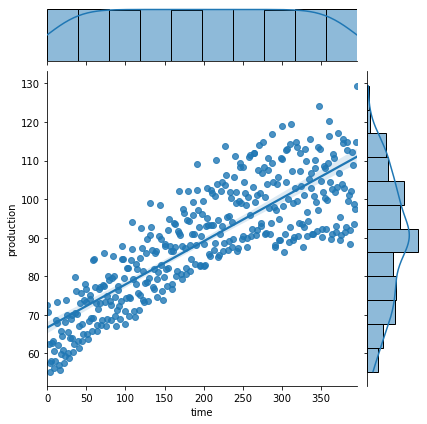

In [18]:
sns.jointplot(x='time',y='production', data=df0, kind='reg')

<AxesSubplot:xlabel='production'>

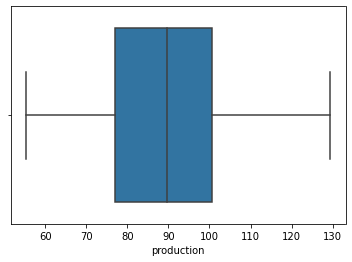

In [15]:
# check for outlier
sns.boxplot(x='production',data=df0)

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
X = df0.loc[:,['time']]
y = df0.loc[:,'production']

# train the model
model = LinearRegression()
model.fit(X,y)

Checking X array...
Checking y array...


LinearRegression()

In [28]:
# get prediction
y_pred = model.predict(X)


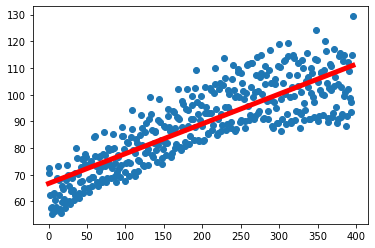

In [34]:
x = np.arange(len(X.index))

fig, ax = plt.subplots()
# plot line for predict
ax.plot(x,y_pred,linewidth=5.0,color='r')
# plot scatter for actual data points
plt.scatter(x=x,y=y)